In [1]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from 'c:\\Users\\ainat\\Internship_CACOLAC\\sim_models\\First_sim_CACOLAC\\double_exo.py'>

#### Reminder of the general model

\begin{cases}
\dot{x} = g(x)x - f(x,y)y\\ 
\dot{y} = \gamma f(x,y) y - m(x,y)y\\
x(nT^{+}) = x(nT) - E_xh_x(x(nT))\\
y(nT^{+}) = y(nT) - E_yh_y(y(nT))\\
\end{cases} 

The aim is to compare the efficiency of two different models with exogenous mortality on pests $x$.  
There are two criteria for the comparison: the number of pests accumulated during the period (represented by the integral of $x$ at equilibrium/periodic solution); and the time for $x$ to reach an $\epsilon$ value starting from the same value.

In [2]:
#Fixed parameters
r = 0.5
K = 10 
a = 0.1
m = 0.1
gamma = 0.8

E_inf = r - 0.1 # E < r
E_sup = r + 0.1 # E > r
T = 10

t_0 = 0
t_n = 100

tt = 1 #just to not have a missing argument t when we solve models

# 1 Presence of pests $x$ only

#### Continuous model

\begin{cases}
\dot{x} = [r(1-\frac{x}{K})y- E_x]x- 0 \times y\\ 
\dot{y} = 0 \times y - 0 \times y\\
x(nT^{+}) = x(nT) - E_x \times 0\\
y(nT^{+}) = y(nT) - E_y \times 0\\
\end{cases}  
with $y_0 = 0$

#### Impulsive model

\begin{cases}
    \dot{x} = r(1-\frac{x}{K})x - 0 \times y\\ 
    \dot{y} = 0 \times y - 0 \times y\\
    x(nT^{+}) = x(nT) - (1 - e^{-E_xT})x(nT)\\
    y(nT^{+}) = y(nT) - E_y \times 0
\end{cases}
with $y_0 = 0$

## 1.1 First criterium : integral of $x$ at equilibrium for the continuous model and at periodic solution for the impulsive solution.

Analytic method: compare $\frac{1}{T} \int _0^{T} x_p(t)dt$ and $K \left ( 1 - \frac{E}{r}\right )$

$\frac{1}{T} \int _0^{T} x_p(t)dt = \frac{K}{r} \dfrac{e^{(r-E)T} - 1}{e^{rT} - 1} \text{ln} \left ( \dfrac{e^{rT} - e^{-ET}}{1- e^{-ET}} \right )$

In [3]:
#Inital value of the periodic solution
E_tilde = 1 - np.exp(-E_inf*T)
x_p_0 = ( ( np.exp(r*T) * (1 - E_tilde) - 1 ) * K ) / ( np.exp(r*T) - 1 )

#Inital value of the equilibrium
x_star = K * (1 - E_inf/r)

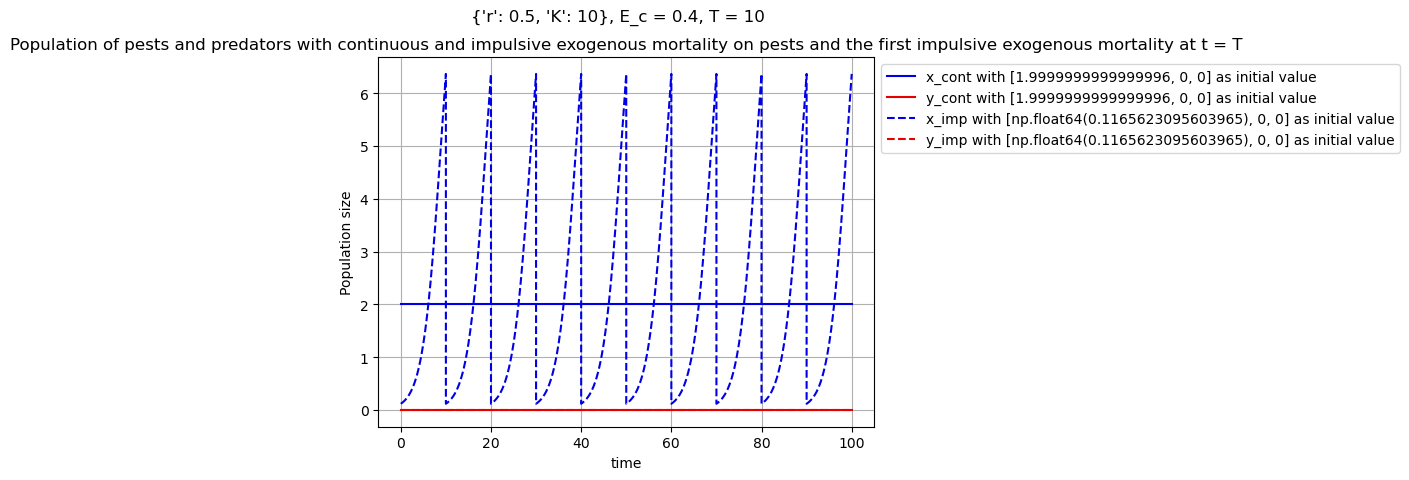

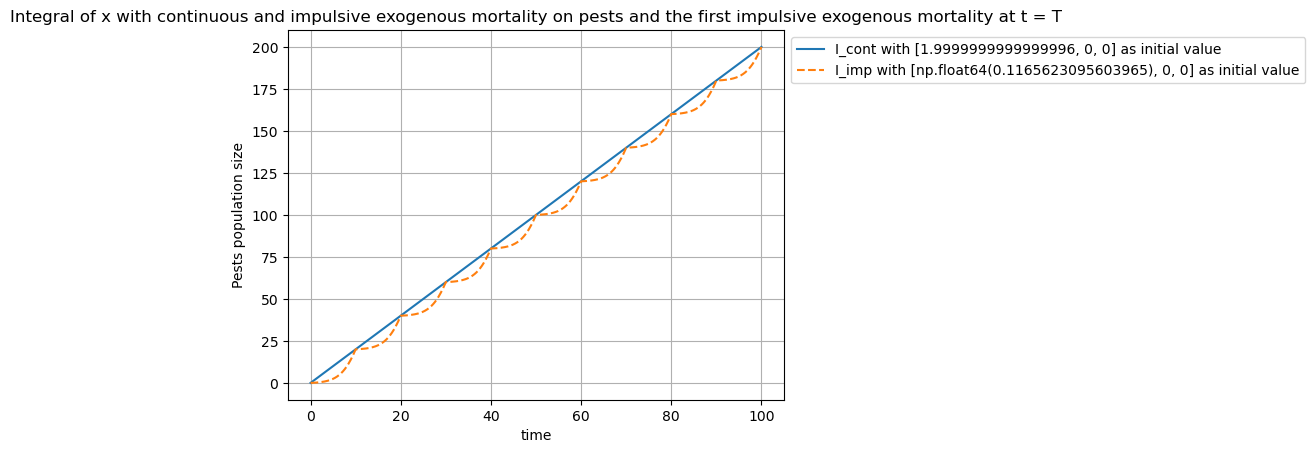

('The final value of the integral of x with continuous exogenous mortality is 199.99999999999997',
 'The final value of the integral of x with impulsive exogenous mortality is 199.99998051423265')

In [4]:
double_exo.compare_cont_imp_proportional_mortality_on_x_T(
    xyI0_imp = [x_p_0,0,0],
    xyI0_cont = [x_star,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_inf,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    find_t_below_eps=False,
)

## 1.2 Second criterium : time to reach $\epsilon$ starting from the same initial value

To have eradication, we always set $E_c > r$

First exogenous mortality event at $t=T$

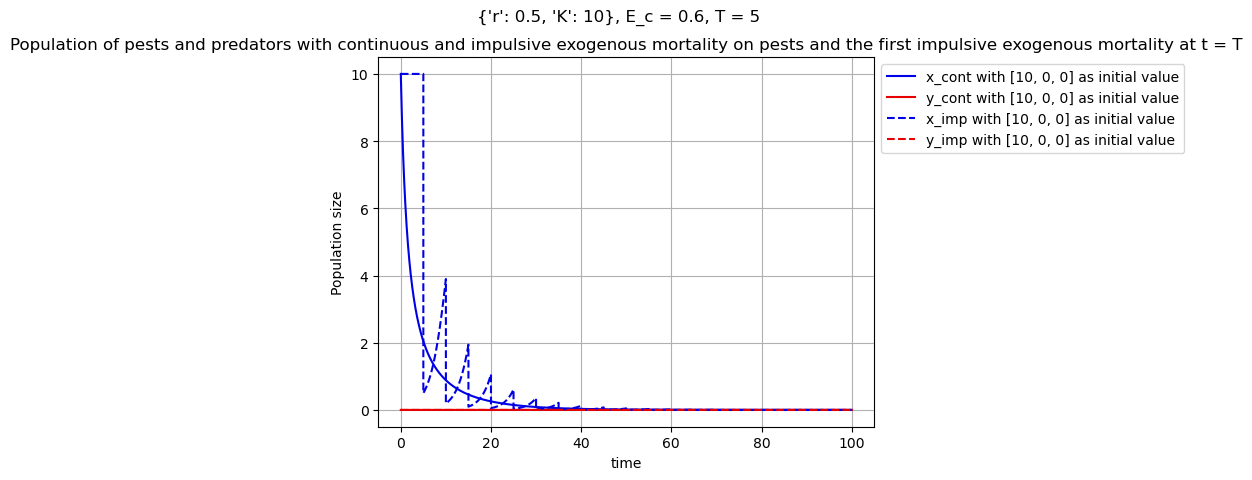

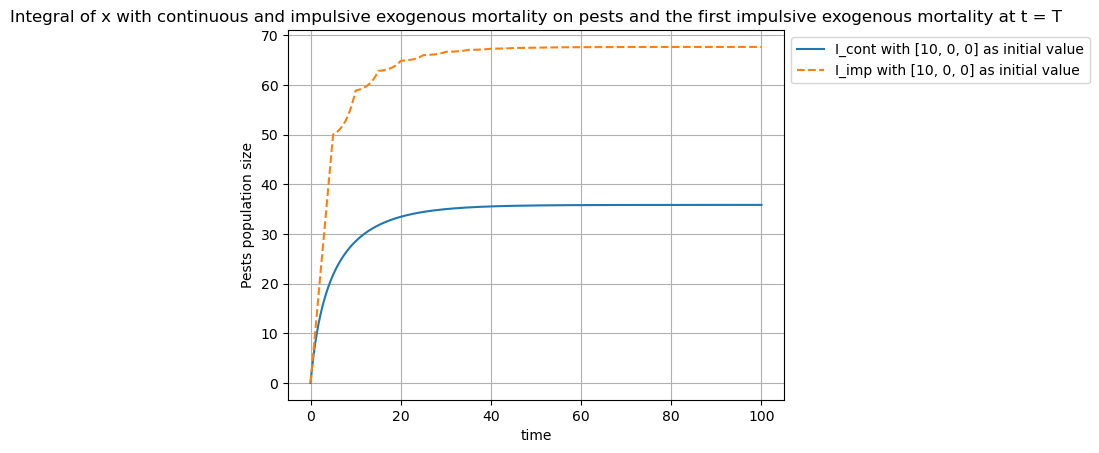

('The final value of the integral of x with continuous exogenous mortality is 35.83443279398012',
 'The final value of the integral of x with impulsive exogenous mortality is 67.63280876199002',
 'The time for x to reach 0.01 with continuous exogenous mortality is 51.25',
 'The time for x to reach 0.01 with impulsive exogenous mortality is 65.0')

In [26]:
double_exo.compare_cont_imp_proportional_mortality_on_x_T(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    find_t_below_eps=True,
    eps=0.01
)

First exogenous mortality event at $t=0$

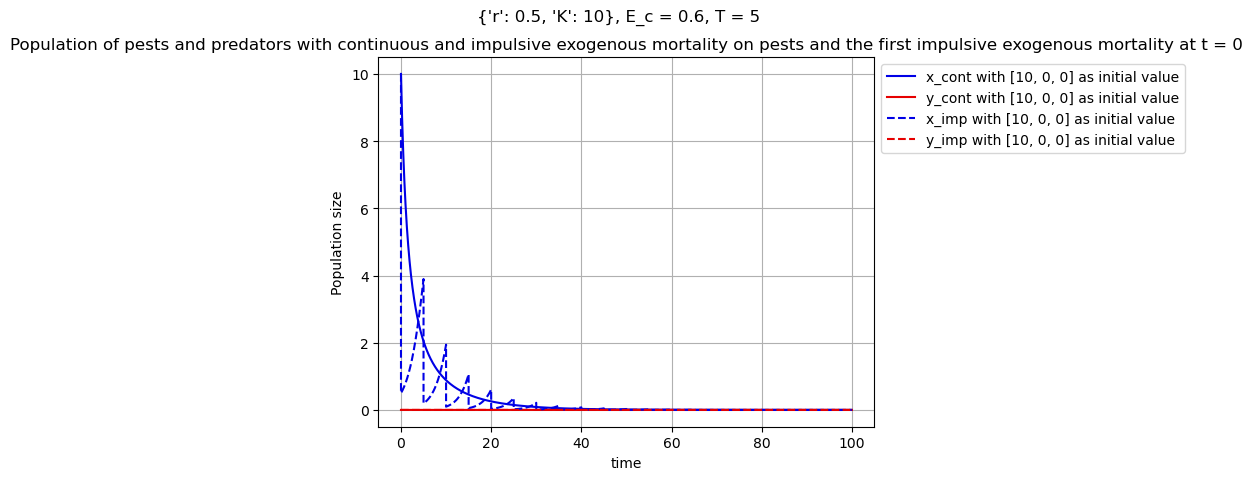

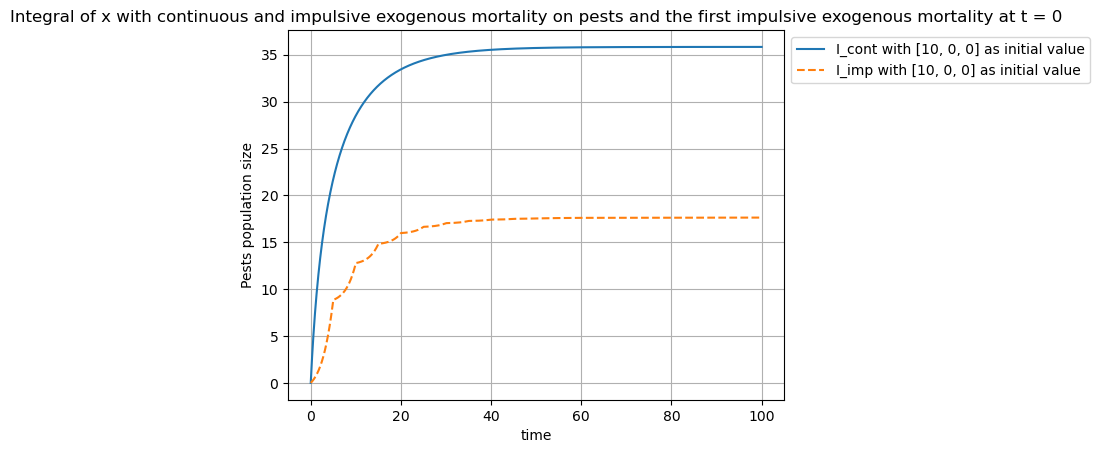

('The final value of the integral of x with continuous exogenous mortality is 35.83443279398012',
 'The final value of the integral of x with impulsive exogenous mortality is 17.633153662017758',
 'The time for x to reach 0.01 with continuous exogenous mortality is 51.25',
 'The time for x to reach 0.01 with impulsive exogenous mortality is 60.0')

In [22]:
double_exo.compare_cont_imp_proportional_mortality_on_x_0(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    find_t_below_eps=True,
    eps=0.01
)

First exogenous mortality event at $t=1$ (for example)

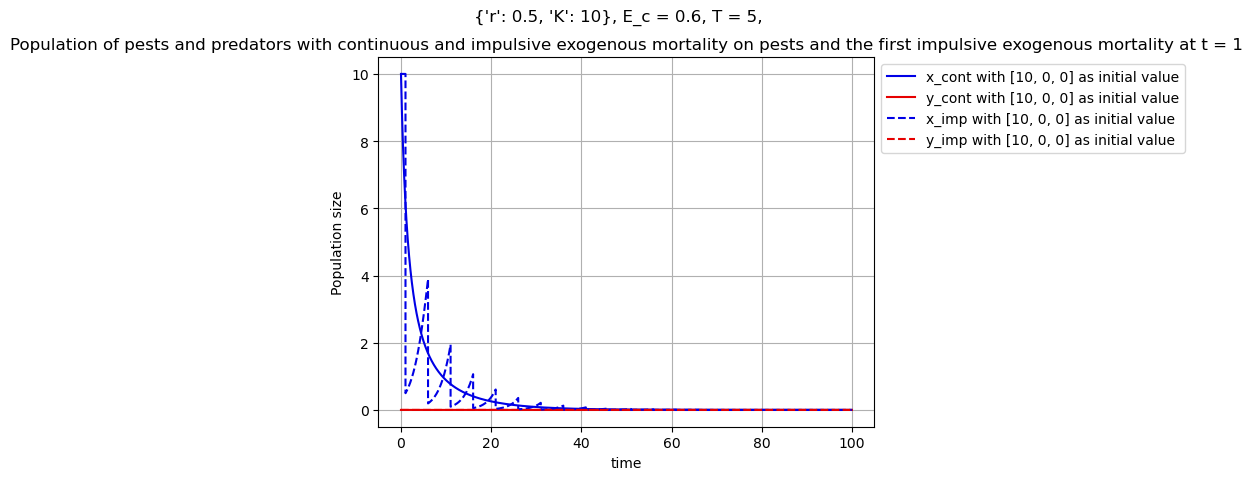

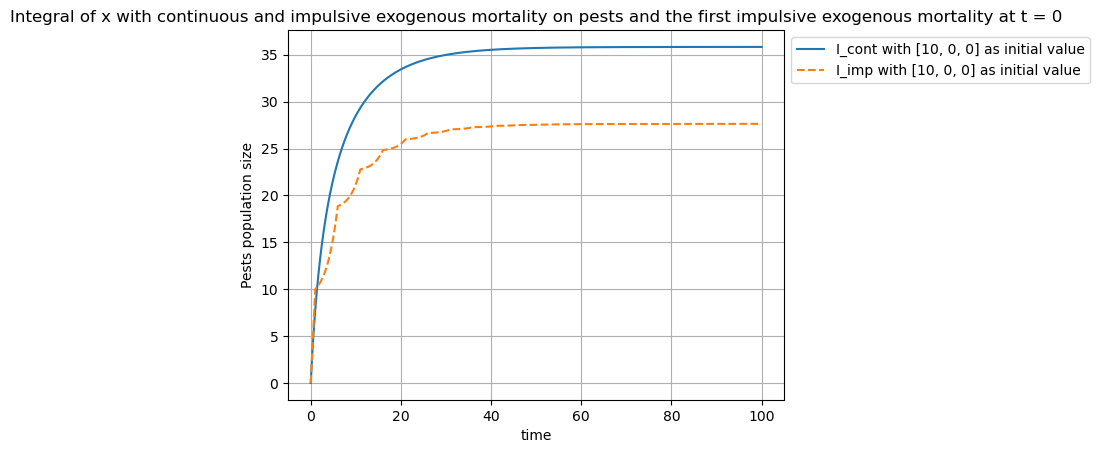

('The final value of the integral of x with continuous exogenous mortality is 35.834432930598574',
 'The final value of the integral of x with impulsive exogenous mortality is 27.633003932446563',
 'The time for x to reach 0.01 with continuous exogenous mortality is 51.25',
 'The time for x to reach 0.01 with impulsive exogenous mortality is 61.0')

In [29]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=1,
    find_t_below_eps=True,
    eps=0.01
)

# 2 Presence of both pests $x$ and predators $y$

## 2.1 First criterium : integral of $x$ at equilibrium for the continuous model and at periodic solution for the impulsive solution.

## 2.2 Second criterium : time to reach $\epsilon$ starting from the same initial value

In [23]:
#Same initial value
xyI0 = [K, 0.1, 0]

First exogenous mortality event at $t=T$

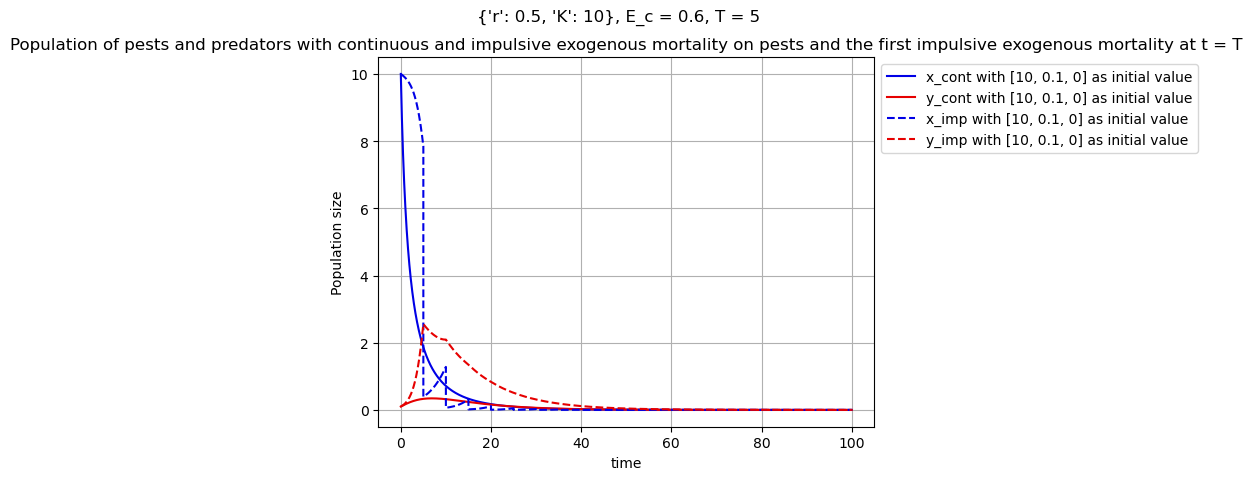

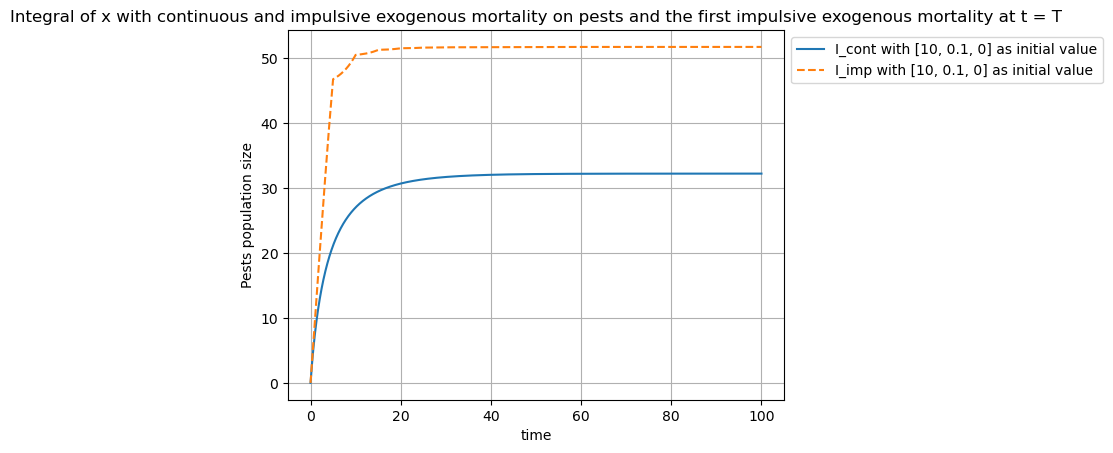

('The final value of the integral of x with continuous exogenous mortality is 32.233491452521854',
 'The final value of the integral of x with impulsive exogenous mortality is 51.74239973433285',
 'The time for x to reach 0.01 with continuous exogenous mortality is 46.25',
 'The time for x to reach 0.01 with impulsive exogenous mortality is 35.0')

In [24]:
double_exo.compare_cont_imp_proportional_mortality_on_x_T(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    find_t_below_eps=True,
    eps=0.01
)

First exogenous mortality event at $t=0$

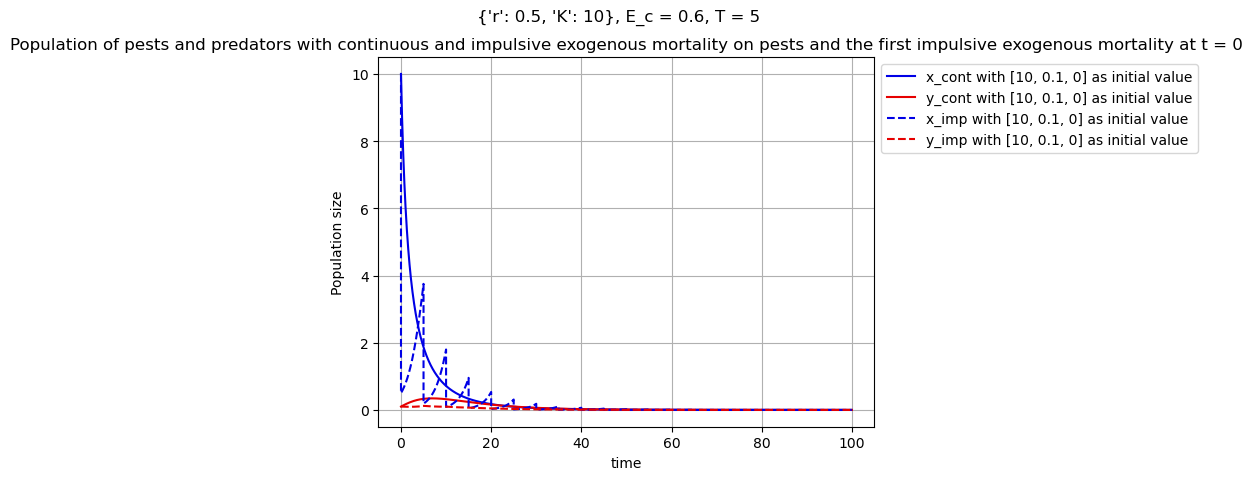

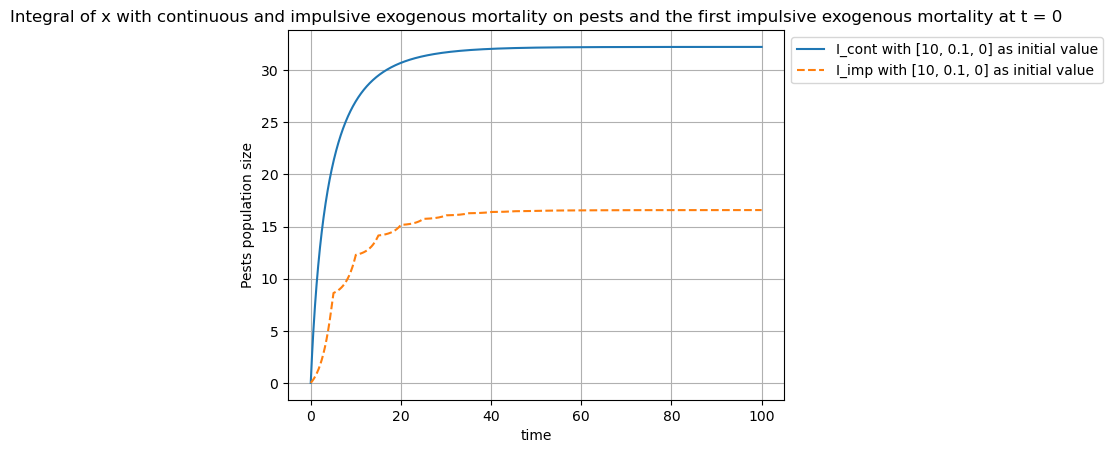

('The final value of the integral of x with continuous exogenous mortality is 32.233491452521854',
 'The final value of the integral of x with impulsive exogenous mortality is 16.582298948806628',
 'The time for x to reach 0.01 with continuous exogenous mortality is 46.25',
 'The time for x to reach 0.01 with impulsive exogenous mortality is 55.0')

In [25]:
double_exo.compare_cont_imp_proportional_mortality_on_x_0(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    find_t_below_eps=True,
    eps=0.01
)